In [1]:
import numpy as np
from mfpml.optimization.sfbo import SFBO
from mfpml.problems.singlefidelity_functions import Forrester

In [2]:
# define problem
func = Forrester()
problem = func.f

# define single fidelity bayesian optimization
bo = SFBO(problem=problem, design_space=func.design_space)
bo.run_optimizer(num_init=2, num_iter=15, acquisition='LCB',
                 stopping_error=0.01, optimum=func.optimum)

iter:1 =====================================
best_y: -2.639393
best_x: [0.65882407]
error: 0.561616
iter:2 =====================================
best_y: -4.093232
best_x: [0.68860539]
error: 0.320145
iter:3 =====================================
best_y: -4.093232
best_x: [0.68860539]
error: 0.320145
iter:4 =====================================
best_y: -4.093232
best_x: [0.68860539]
error: 0.320145
iter:5 =====================================
best_y: -4.093232
best_x: [0.68860539]
error: 0.320145
iter:6 =====================================
best_y: -5.681697
best_x: [0.78169598]
error: 0.056312
iter:7 =====================================
best_y: -6.020726
best_x: [0.75708739]
error: 0.000002


(array([-6.02072616]), array([-6.02072616]))

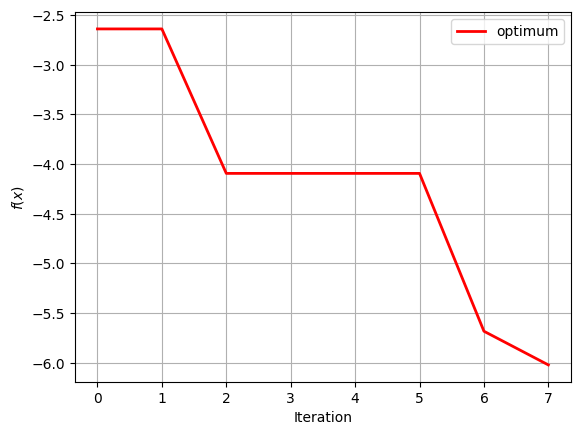

In [5]:
# print(best_y, best_x)
bo.plot_optimization_history()

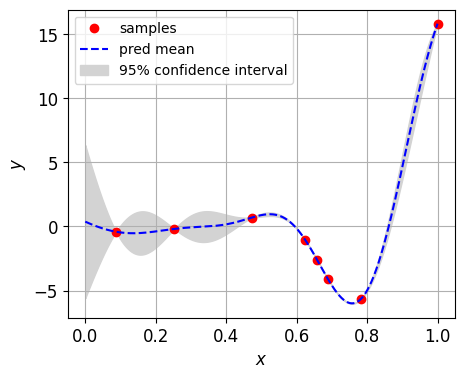

In [7]:
bo.model.plot(figsize=(5, 4))